In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use('ggplot')

import nltk

In [2]:
# Read in data
df = pd.read_excel('Employer_lemmatized_data.xlsx', engine = "openpyxl")
print(df.shape)

print(df.shape)

(4374, 13)
(4374, 13)


## Basic NLTK

# Step 1. VADER Seniment Scoring
### We will use NLTK's SentimentIntensityAnalyzer to get the neg/neu/pos scores of the text.

    This uses a "bag of words" approach:
    Stop words are removed
    each word is scored and combined to a total score.

In [3]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

sia = SentimentIntensityAnalyzer()

In [4]:
df.head()

,Respondent ID,Terms,Class (BOT),College Code,Major Code,Conc,Co-op #,Citizenship Status,What are the student's strengths?,What are the student's weaknesses/areas for improvement?,"What changes, if any, would you suggest for the academic preparation of this student?",year,unique_id
0,477,201615-201625,JR,BE,ECON,5COP,Third,International,feel willing direct,show modest initiative low energy participant ...,math accounting coursework,2016,NaN
1,710,201615-201625,SR,BE,ECON,4COP,Only,International,high level intellectual curiosity ask very goo...,prioritize workload escalate issue soon area i...,think exposure valuation technique private pub...,2016,NaN
2,811,201615-201625,PJ,BE,ECON,5COP,Second,US Citizen,willing able willing ask question frame intell...,additional exposure understand preferred caree...,plan pursue long term opportunity continue inc...,2016,NaN
3,837,201615-201625,JR,BE,ECON,5COP,Third,US Citizen,antonio outgoing great attitude work place,student fulfil need position,NaN,2016,NaN
4,1252,201615-201625,PJ,BE,ECON,5COP,Second,US Citizen,matthew skilled excel learn accomplish necessa...,matthew slow worker take long necessary finish...,strong focus personal finance like tax law fil...,2016,NaN


# Polarity score on entire data set

In [5]:
# Run the polarity score on the entire dataset
res = {}
for i, row in tqdm(df.iterrows(), total=len(df)):
    text = row["What changes, if any, would you suggest for the academic preparation of this student?"]
    myid = row['Respondent ID']
    res[myid] = sia.polarity_scores(str(text))

  0%|          | 0/4374 [00:00<?, ?it/s]

In [6]:
res[2301]

{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}

In [7]:
senti = pd.DataFrame(res).T

In [8]:
senti = pd.DataFrame(res).T
senti = senti.reset_index().rename(columns = {"index": "Respondent ID", "compound": "Sentiment Score"})
senti = senti.merge(df, how = "left")                    

In [9]:
senti.head()

,Respondent ID,neg,neu,pos,Sentiment Score,Terms,Class (BOT),College Code,Major Code,Conc,Co-op #,Citizenship Status,What are the student's strengths?,What are the student's weaknesses/areas for improvement?,"What changes, if any, would you suggest for the academic preparation of this student?",year,unique_id
0,477,0.0,1.000,0.000,0.0000,201615-201625,JR,BE,ECON,5COP,Third,International,feel willing direct,show modest initiative low energy participant ...,math accounting coursework,2016,NaN
1,710,0.0,0.250,0.750,0.4588,201615-201625,SR,BE,ECON,4COP,Only,International,high level intellectual curiosity ask very goo...,prioritize workload escalate issue soon area i...,think exposure valuation technique private pub...,2016,NaN
2,710,0.0,0.250,0.750,0.4588,201815-201825,PJ,B,ACCT,5COP,Second,US Citizen,anjli complete task time work timeline willing...,anjli expand knowledge base build relationship...,excel formula,2018,NaN
3,811,0.0,0.661,0.339,0.7717,201615-201625,PJ,BE,ECON,5COP,Second,US Citizen,willing able willing ask question frame intell...,additional exposure understand preferred caree...,plan pursue long term opportunity continue inc...,2016,NaN
4,811,0.0,0.661,0.339,0.7717,201715-201725,SR,B,FIN,5COP,Second,US Citizen,course michael dthemonstrate ability learn ver...,note formal audit engagthement work product im...,michael hard worker team player eager learn te...,2017,NaN


## Sentiment score and our data set merged together

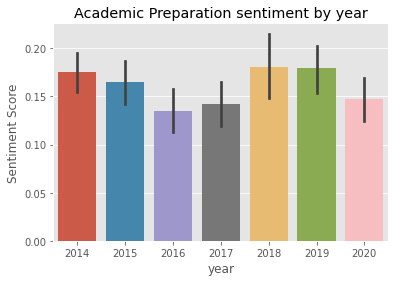

In [10]:

ax = sns.barplot(data=senti, x='year', y='Sentiment Score', estimator='mean', errorbar=('ci', 95))

ax.set_title('Academic Preparation sentiment by year')
plt.show()

In [11]:
senti['sentiment'] = senti['Sentiment Score'].apply(lambda c: 'Positive' if c >=0.5 else ('Negative' if c < 0 else 'Neutral'))

senti.head(5)

,Respondent ID,neg,neu,pos,Sentiment Score,Terms,Class (BOT),College Code,Major Code,Conc,Co-op #,Citizenship Status,What are the student's strengths?,What are the student's weaknesses/areas for improvement?,"What changes, if any, would you suggest for the academic preparation of this student?",year,unique_id,sentiment
0,477,0.0,1.000,0.000,0.0000,201615-201625,JR,BE,ECON,5COP,Third,International,feel willing direct,show modest initiative low energy participant ...,math accounting coursework,2016,NaN,Neutral
1,710,0.0,0.250,0.750,0.4588,201615-201625,SR,BE,ECON,4COP,Only,International,high level intellectual curiosity ask very goo...,prioritize workload escalate issue soon area i...,think exposure valuation technique private pub...,2016,NaN,Neutral
2,710,0.0,0.250,0.750,0.4588,201815-201825,PJ,B,ACCT,5COP,Second,US Citizen,anjli complete task time work timeline willing...,anjli expand knowledge base build relationship...,excel formula,2018,NaN,Neutral
3,811,0.0,0.661,0.339,0.7717,201615-201625,PJ,BE,ECON,5COP,Second,US Citizen,willing able willing ask question frame intell...,additional exposure understand preferred caree...,plan pursue long term opportunity continue inc...,2016,NaN,Positive
4,811,0.0,0.661,0.339,0.7717,201715-201725,SR,B,FIN,5COP,Second,US Citizen,course michael dthemonstrate ability learn ver...,note formal audit engagthement work product im...,michael hard worker team player eager learn te...,2017,NaN,Positive


<AxesSubplot:title={'center':'All years'}, ylabel='sentiment'>

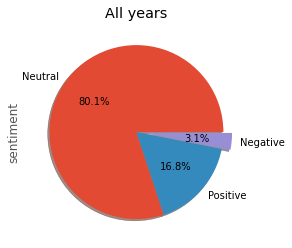

In [14]:
senti["sentiment"].value_counts().plot.pie(y='All years', title="All years", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0)

<AxesSubplot:title={'center':'All years'}, ylabel='sentiment'>

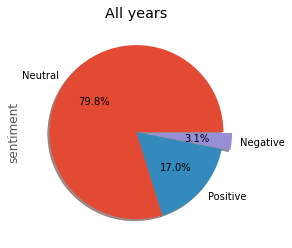

In [17]:
filt = senti["year"] == 2015
senti.loc[filt]["sentiment"].value_counts().plot.pie(y='2015', title="All years", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0)


<AxesSubplot:title={'center':'2016'}, ylabel='sentiment'>

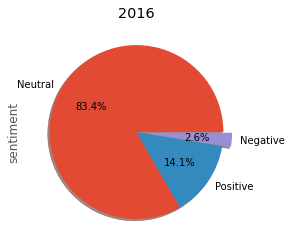

In [18]:
filt = senti["year"] == 2016
senti.loc[filt]["sentiment"].value_counts().plot.pie(y='All years', title="2016", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0)

<AxesSubplot:title={'center':'2017'}, ylabel='sentiment'>

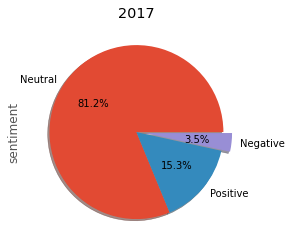

In [19]:
filt = senti["year"] == 2017
senti.loc[filt]["sentiment"].value_counts().plot.pie(y='All years', title="2017", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0)

<AxesSubplot:title={'center':'2018'}, ylabel='sentiment'>

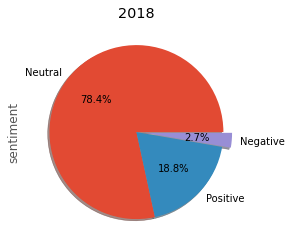

In [20]:
filt = senti["year"] == 2018
senti.loc[filt]["sentiment"].value_counts().plot.pie(y='All years', title="2018", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0)

<AxesSubplot:title={'center':'2019'}, ylabel='sentiment'>

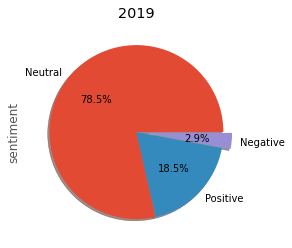

In [21]:
filt = senti["year"] == 2019
senti.loc[filt]["sentiment"].value_counts().plot.pie(y='All years', title="2019", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0)

<AxesSubplot:title={'center':'2020'}, ylabel='sentiment'>

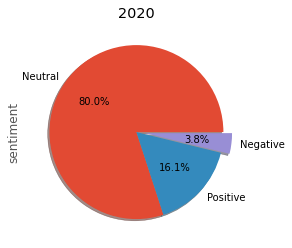

In [22]:
filt = senti["year"] == 2020
senti.loc[filt]["sentiment"].value_counts().plot.pie(y='All years', title="2020", legend=False, \
                   autopct='%1.1f%%', explode=(0, 0, 0.1), \
                   shadow=True, startangle=0)